In [77]:
from matplotlib import pyplot as plt
import scipy as scp
import numpy as np
from numpy import cos, sin, pi,  arange

#from scipy.signal import kaiserord, lfilter, firwin, freqz, convolve,filtfilt

sample_rate = 100.0
nsamples = 400
t = arange(nsamples) / sample_rate
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)
            

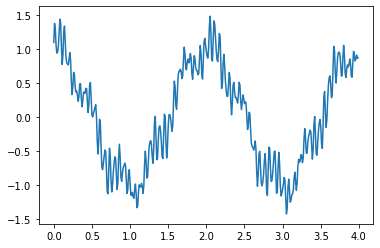

In [78]:
plt.plot(t,x)

  - split the complex fourier result into *angle* and *magnitude* 

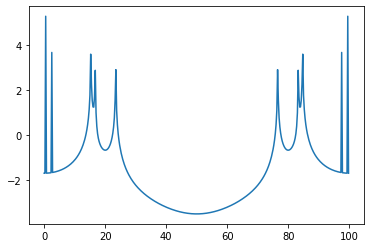

In [86]:

T = 4
#dF = 1/T = 0.25Hz
fs = 100
nyquist-frequency = fs/2

f = np.linspace(0,fs-1/T,fs*T)
plt.plot(f,np.log(np.abs(scp.fft.fft(x))))

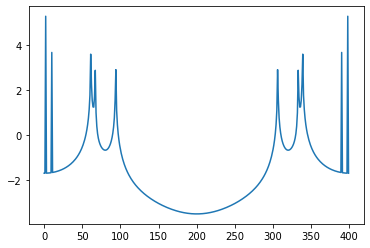

In [25]:
plt.plot(np.log(np.abs(np.fft.fft(x))))

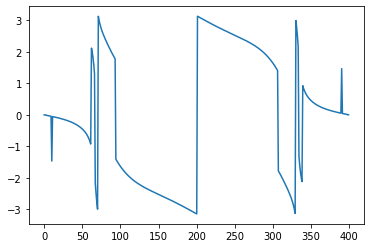

In [26]:
plt.plot(np.angle(scp.fft.fft(x)))

- set the respective magnitudes to zero (we start with a lowpass filter: `magnitude[30:370] = 0`)


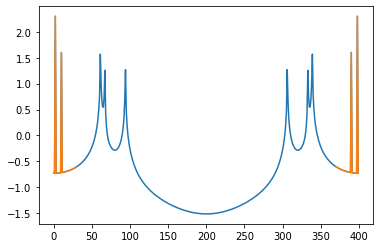

In [27]:
ang = np.angle(scp.fft.fft(x))
mag = np.abs(scp.fft.fft(x))
plt.plot(np.log10(mag))
mag[30:370] = 0
plt.plot(np.log10(mag))

- combine angle and magnitude back to a complex fourier coefficient ($m*e^(1j*ang)$)
- apply the inverse FFT
- plot the signal with what you started out


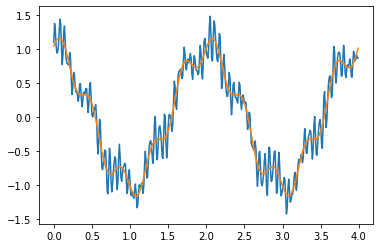

In [28]:
plt.plot(t,x)
plt.plot(t,scp.fft.ifft(mag*np.exp(1j*ang)).real)


## Highpass instead of lowpass

Repeat the steps from above, but this time, remove the low frequency components


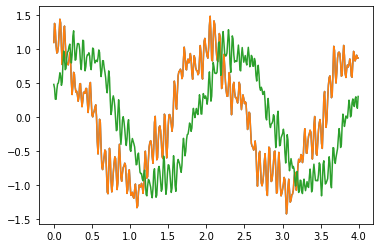

In [34]:
ang = np.angle(scp.fft.fft(x))
mag = np.abs(scp.fft.fft(x))


#mag[1:30] = 0
#mag[370:400] = 0



plt.plot(t,x)
plt.plot(t,scp.fft.ifft(mag*np.exp(1j*ang)).real)

ang_random = np.random.rand(ang.shape[0])*2*np.pi - np.pi
plt.plot(t,scp.fft.ifft(mag*np.exp(1j*ang_random)).real)


In [32]:
ang.shape

(400,)


## What happens to the frequency and time response if we add "artefacts"?
 Add a DC-offset (a step-function) starting from `x[200:]` and investigate the fourier space. Filter it again (low or high pass) and transfer it back to the time domain and investigate the signal around the spike.

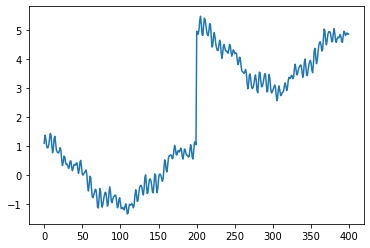

In [36]:
xtmp = x
xtmp[200:] = xtmp[200:]+2
plt.plot(xtmp)

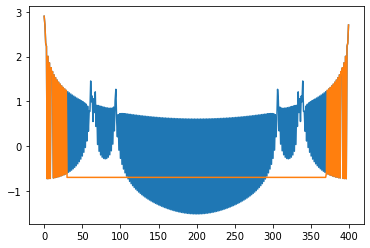

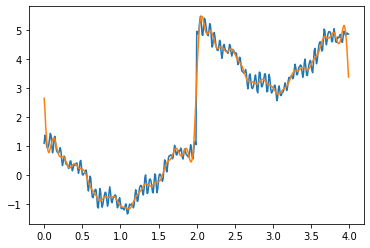

In [37]:

ang = np.angle(scp.fft.fft(xtmp))
mag = np.abs(scp.fft.fft(xtmp))
plt.plot(np.log10(mag))
mag[30:370] = 0.2
plt.plot(np.log10(mag))
plt.show()
plt.plot(t,xtmp)
plt.plot(t,scp.fft.ifft(mag*np.exp(1j*ang)).real)


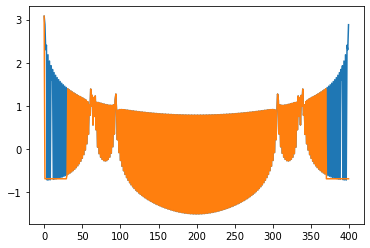

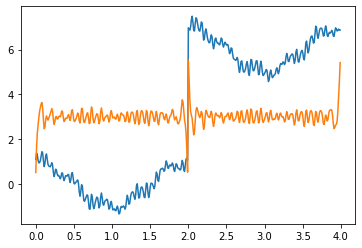

In [38]:
xtmp = x
xtmp[200:] = xtmp[200:]+2
ang = np.angle(scp.fft.fft(xtmp))
mag = np.abs(scp.fft.fft(xtmp))
plt.plot(np.log10(mag))
mag[1:30] = 0.2
mag[370:400] = 0.2
plt.plot(np.log10(mag))
plt.show()
plt.plot(t,x)
plt.plot(t,scp.fft.ifft(mag*np.exp(1j*ang)).real)

 ## Impulse Response Function
 To get a bit deeper understanding of what is going on, have a look at the fourier transform of a new impulse signal (e.g. 1:400 => 0. and 200 => 1.). What do you observe?
 Why would we see ringing if we put most of the coefficients to 0?

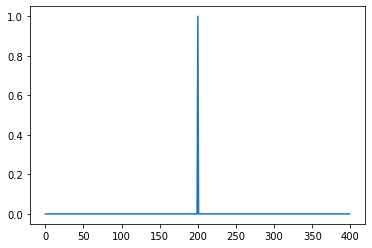

In [44]:
# Impulse Response Function
x[:] =0
x[200] = 1
plt.plot(x)

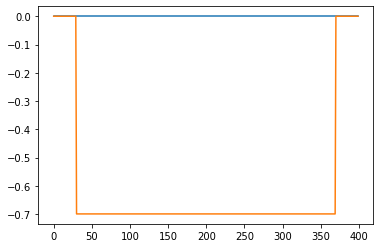

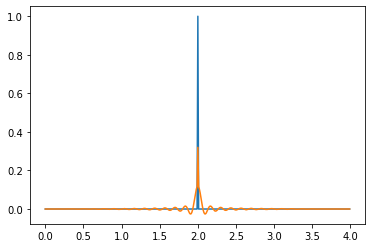

In [46]:

ang = np.angle(scp.fft.fft(x))
mag = np.abs(scp.fft.fft(x))
plt.plot(np.log10(mag))
mag[30:370] = 0.2
plt.plot(np.log10(mag))
plt.show()
plt.plot(t,x)
plt.plot(t,scp.fft.ifft(mag*np.exp(1j*ang)).real)


 ## Filtering EEG data


In [54]:
from mne_bids import (BIDSPath,read_raw_bids)
import mne_bids
import importlib
import ccs_eeg_utils

bids_root = "../local/bids"
subject_id = '002'


bids_path = BIDSPath(subject=subject_id,task="P3",session="P3",
                     datatype='eeg', suffix='eeg',
                     root=bids_root)
raw = read_raw_bids(bids_path)
ccs_eeg_utils.read_annotations_core(bids_path,raw)
raw.load_data()

Reading ..\local\bids\sub-002\ses-P3\eeg\sub-002_ses-P3_task-P3_eeg.fdt
Reading events from ..\local\bids\sub-002\ses-P3\eeg\sub-002_ses-P3_task-P3_events.tsv.
Reading channel info from ..\local\bids\sub-002\ses-P3\eeg\sub-002_ses-P3_task-P3_channels.tsv.
Reading 0 ... 414719  =      0.000 ...   404.999 secs...


<RawEEGLAB | sub-002_ses-P3_task-P3_eeg.fdt, 33 x 414720 (405.0 s), ~104.5 MB, data loaded>

**T:** Choose the channel "Pz", plot the channel (same as previous HW)

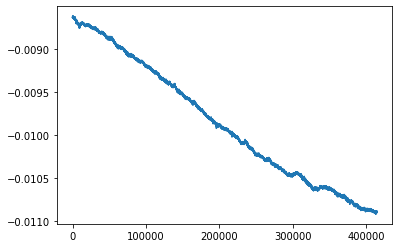

In [59]:
#%matplotlib qt
raw.pick_channels(["Pz"])#["Pz","Fz","Cz"])
plt.plot(raw[:,:][0].T)

**T:** Plot the fourier space using `raw.plot_psd`


Effective window size : 2.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


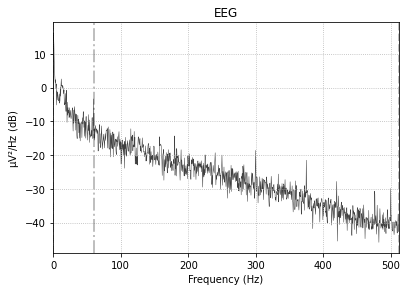

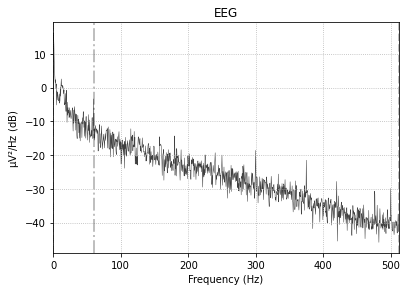

In [89]:
%matplotlib inline
raw.plot_psd(area_mode='range', tmax=10.0, average=False,xscale="linear",)


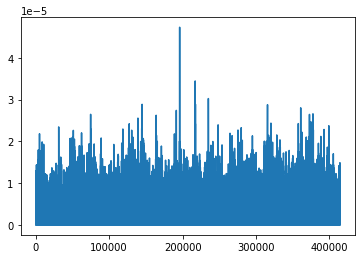

In [90]:
plt.plot(np.abs(np.fft.fft(raw_f[:,:][0].T)))


**T:** Now we filter using `raw.filter()`, specify a highpass of 0.5Hz and a lowpass of 50Hz. Plot the fourier spectrum again.

**T:** Plot the channel again, did the filter work as indented?


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 6759 samples (6.601 sec)

Effective window size : 2.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


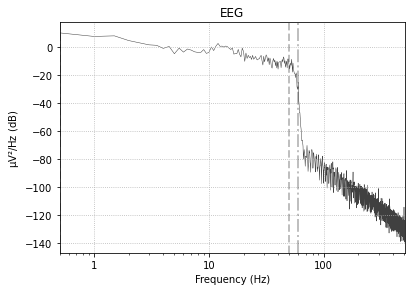

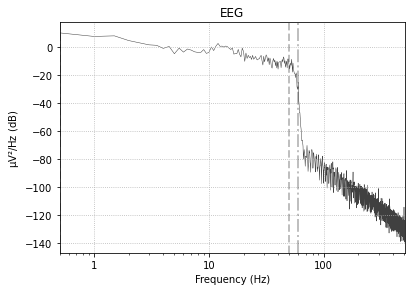

In [64]:
raw_f = raw.copy().filter(0.5,50, fir_design='firwin')
raw_f.plot_psd(area_mode='range', tmax=10.0, average=False,xscale="log")

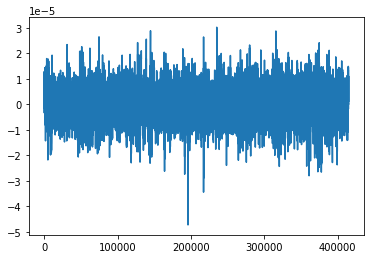

In [65]:

plt.plot(raw_f[:,:][0].T)

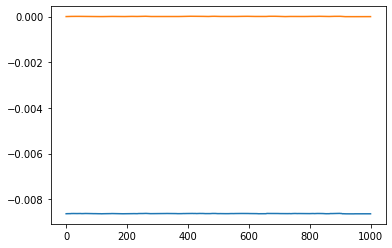

In [66]:
plt.plot(raw[:,0:1000][0].T)
plt.plot(raw_f[:,0:1000][0].T)

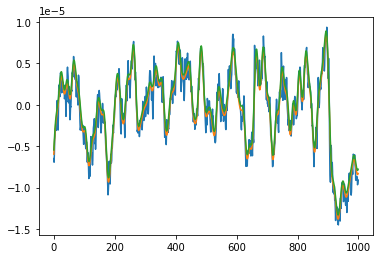

In [69]:
plt.plot(raw[:,0:1000][0].T-np.median(raw[:,0:1000][0].T))
plt.plot(raw_f[:,0:1000][0].T-np.median(raw_f[:,0:1000][0].T))
plt.plot(raw_f[:,0:1000][0].T-np.mean(raw_f[:,0:1000][0].T))

In [71]:
np.median(raw_f[:,:][0].T)

8.436601343800396e-08

In [72]:
np.mean(raw_f[:,:][0].T)

1.6898159545793145e-08

(array([  671.,  2066.,  3430.,  5503.,  7354.,  3755.,  2478.,  1405.,
         3113.,  1890.,   817.,  1348.,  3663.,  2374.,  1062.,   935.,
         1685.,  3729.,  3567.,  2994.,  1868.,  1169.,  1143.,  2387.,
         4934., 10329.,  8959.,  4811.,  1334.,  1744.,  1438.,  1267.,
         1583.,   661.,  1347.,  2066.,  1314.,   586.,  3126.,  8521.,
         5838.,  4606.,  1361.,  1819.,  1730.,  1454.,  2536.,  2068.,
         2372.,  1864.,  2758.,  1094.,   715.,  1287.,  3842.,  4040.,
         1390.,  2262.,  2271.,  3421.,  2978.,   671.,   764.,   839.,
          851.,  2006.,  2341.,  1339.,   687.,   355.,   864.,  4155.,
         4652.,  1272.,   855.,   557.,  1134.,  1931.,  2404.,  1854.,
         1714.,  2207.,  1143.,  1471.,  1279.,  3473.,  3484.,  1847.,
         1330.,  2760.,  2620.,  1244.,  1871.,  1334.,  1078.,  1866.,
         2253.,  1316.,  2004.,   755.,  1041.,  1552.,   912.,  1068.,
         2063.,  1498.,  1041.,  1894.,  1330.,   789.,   821., 

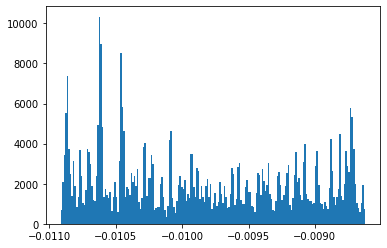

In [75]:
plt.hist(raw[:,:][0].T,bins=200)